In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
sys.path.append(os.path.abspath(".."))
from helpers.plotting_3d import generate_box_edge_points


In [2]:
with open("../intermediate_files/downsampled_spacepoints.pkl", "rb") as f:
    outputs = pickle.load(f)

true_gamma_info_df = outputs[0]
real_nu_reco_nu_downsampled_spacepoints = outputs[1]
real_nu_reco_cosmic_downsampled_spacepoints = outputs[2]
real_cosmic_reco_nu_downsampled_spacepoints = outputs[3]
real_cosmic_reco_cosmic_downsampled_spacepoints = outputs[4]
real_gamma1_downsampled_spacepoints = outputs[5]
real_gamma2_downsampled_spacepoints = outputs[6]
real_other_particles_downsampled_spacepoints = outputs[7]
real_cosmic_downsampled_spacepoints = outputs[8]

true_gamma_info_df

,run,subrun,event,true_nu_vtx_x,true_nu_vtx_y,true_nu_vtx_z,reco_nu_vtx_x,reco_nu_vtx_y,reco_nu_vtx_z,true_num_gamma,true_gamma_energies,true_gamma_pairconversion_xs,true_gamma_pairconversion_ys,true_gamma_pairconversion_zs,true_num_gamma_pairconvert,true_num_gamma_pairconvert_in_FV,true_num_gamma_pairconvert_in_FV_20_MeV
0,20662,70,3504,218.050201,10.557931,512.950195,222.065872,3.455418,515.080261,2,"[0.19244033, 0.11692714]","[219.84596, 225.9368]","[-3.5821111, 4.13989]","[513.35254, 509.40204]",2,2,2
1,20662,70,3520,157.797638,115.460663,595.963623,-1.000000,-1.000000,-1.000000,2,"[0.06735675, 0.3216021]","[151.1176, 160.16414]","[92.293396, 110.36282]","[609.72296, 600.79004]",2,2,2
2,20662,70,3524,109.603363,68.363335,11.934941,111.093262,67.926132,13.001895,2,"[0.27437308, 0.24279542]","[103.465744, 110.35245]","[67.9826, 68.488556]","[23.245634, 13.592195]",2,2,2
3,20662,70,3525,153.996658,-86.547554,912.911194,156.866974,-81.698502,912.352234,2,"[0.11253594, 0.10826495]","[157.01604, 160.78224]","[-81.90377, -82.38176]","[912.2555, 914.51636]",2,2,2
4,20662,70,3527,182.713669,-51.607906,259.962067,186.317184,-49.625145,260.065735,2,"[0.101843834, 0.19027211]","[192.40457, 200.51535]","[-21.61129, -51.388386]","[286.089, 281.3496]",2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19842,11,561,247.135162,-69.845261,163.200256,-1.000000,-1.000000,-1.000000,2,"[0.045880623, 0.296222]","[260.96994, 269.34808]","[-68.50365, -113.459076]","[153.0708, 180.51161]",2,0,0
96,19842,11,565,39.959526,57.828171,863.957764,-1.000000,-1.000000,-1.000000,2,"[0.3653015, 0.04661471]","[7.5538044, -8.53771]","[34.068348, 67.85912]","[910.5921, 864.68225]",2,1,1
97,19842,11,566,108.863686,113.518784,9.844266,-1.000000,-1.000000,-1.000000,2,"[0.05793574, 0.13151945]","[110.378876, 108.391495]","[84.67002, 113.76922]","[14.7643795, 1.6555953]",2,2,2
98,19842,11,571,219.459671,-31.645622,940.627136,222.690643,-30.388205,938.349976,2,"[0.14220285, 0.036923617]","[228.48898, 221.4423]","[-16.908535, -24.605856]","[883.45795, 948.8214]",2,2,2


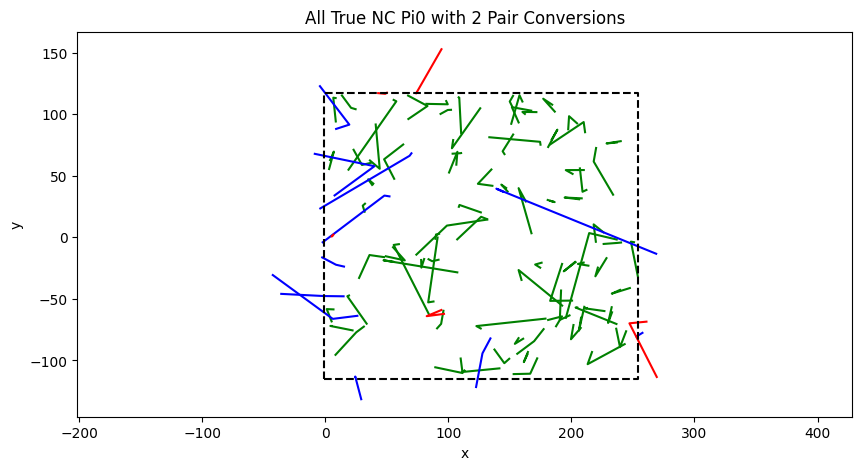

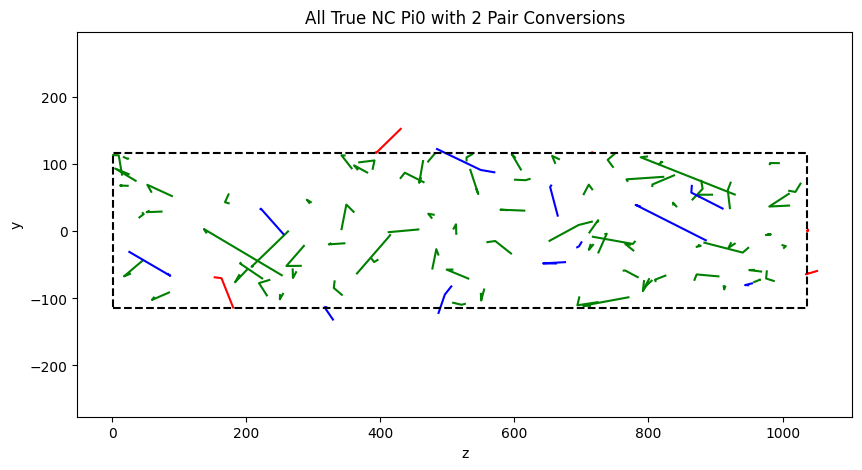

In [3]:
two_pair_conversion_df = true_gamma_info_df[true_gamma_info_df["true_num_gamma_pairconvert"] == 2]

two_in_df = two_pair_conversion_df[two_pair_conversion_df["true_num_gamma_pairconvert_in_FV"] == 2]
one_in_df = two_pair_conversion_df[two_pair_conversion_df["true_num_gamma_pairconvert_in_FV"] == 1]
zero_in_df = two_pair_conversion_df[two_pair_conversion_df["true_num_gamma_pairconvert_in_FV"] == 0]

two_in_df_first_pairconversion_xs = [x[0] for x in two_in_df["true_gamma_pairconversion_xs"]]
two_in_df_first_pairconversion_ys = [x[0] for x in two_in_df["true_gamma_pairconversion_ys"]]
two_in_df_first_pairconversion_zs = [x[0] for x in two_in_df["true_gamma_pairconversion_zs"]]   
two_in_df_second_pairconversion_xs = [x[1] for x in two_in_df["true_gamma_pairconversion_xs"]]
two_in_df_second_pairconversion_ys = [x[1] for x in two_in_df["true_gamma_pairconversion_ys"]]
two_in_df_second_pairconversion_zs = [x[1] for x in two_in_df["true_gamma_pairconversion_zs"]]
two_in_df_nu_vtx_xs = two_in_df["true_nu_vtx_x"].tolist()
two_in_df_nu_vtx_ys = two_in_df["true_nu_vtx_y"].tolist()
two_in_df_nu_vtx_zs = two_in_df["true_nu_vtx_z"].tolist()

one_in_df_first_pairconversion_xs = [x[0] for x in one_in_df["true_gamma_pairconversion_xs"]]
one_in_df_first_pairconversion_ys = [x[0] for x in one_in_df["true_gamma_pairconversion_ys"]]
one_in_df_first_pairconversion_zs = [x[0] for x in one_in_df["true_gamma_pairconversion_zs"]]
one_in_df_second_pairconversion_xs = [x[1] for x in one_in_df["true_gamma_pairconversion_xs"]]
one_in_df_second_pairconversion_ys = [x[1] for x in one_in_df["true_gamma_pairconversion_ys"]]
one_in_df_second_pairconversion_zs = [x[1] for x in one_in_df["true_gamma_pairconversion_zs"]]
one_in_df_nu_vtx_xs = one_in_df["true_nu_vtx_x"].tolist()
one_in_df_nu_vtx_ys = one_in_df["true_nu_vtx_y"].tolist()
one_in_df_nu_vtx_zs = one_in_df["true_nu_vtx_z"].tolist()

zero_in_df_first_pairconversion_xs = [x[0] for x in zero_in_df["true_gamma_pairconversion_xs"]]
zero_in_df_first_pairconversion_ys = [x[0] for x in zero_in_df["true_gamma_pairconversion_ys"]]
zero_in_df_first_pairconversion_zs = [x[0] for x in zero_in_df["true_gamma_pairconversion_zs"]]
zero_in_df_second_pairconversion_xs = [x[1] for x in zero_in_df["true_gamma_pairconversion_xs"]]
zero_in_df_second_pairconversion_ys = [x[1] for x in zero_in_df["true_gamma_pairconversion_ys"]]
zero_in_df_second_pairconversion_zs = [x[1] for x in zero_in_df["true_gamma_pairconversion_zs"]]
zero_in_df_nu_vtx_xs = zero_in_df["true_nu_vtx_x"].tolist()
zero_in_df_nu_vtx_ys = zero_in_df["true_nu_vtx_y"].tolist()
zero_in_df_nu_vtx_zs = zero_in_df["true_nu_vtx_z"].tolist()

in_fv_x_min = -1
in_fv_x_max = 254.3
in_fv_y_min = -115.0
in_fv_y_max = 117.0
in_fv_z_min = 0.6
in_fv_z_max = 1036.4

plt.figure(figsize=(10, 5))
for i in range(len(two_in_df_nu_vtx_xs)):
    plt.plot([two_in_df_first_pairconversion_xs[i], two_in_df_nu_vtx_xs[i], two_in_df_second_pairconversion_xs[i]], 
             [two_in_df_first_pairconversion_ys[i], two_in_df_nu_vtx_ys[i], two_in_df_second_pairconversion_ys[i]], 
             color="green") 
for i in range(len(one_in_df_nu_vtx_xs)):
    plt.plot([one_in_df_first_pairconversion_xs[i], one_in_df_nu_vtx_xs[i], one_in_df_second_pairconversion_xs[i]], 
             [one_in_df_first_pairconversion_ys[i], one_in_df_nu_vtx_ys[i], one_in_df_second_pairconversion_ys[i]], 
             color="blue")
for i in range(len(zero_in_df_nu_vtx_xs)):
    plt.plot([zero_in_df_first_pairconversion_xs[i], zero_in_df_nu_vtx_xs[i], zero_in_df_second_pairconversion_xs[i]], 
             [zero_in_df_first_pairconversion_ys[i], zero_in_df_nu_vtx_ys[i], zero_in_df_second_pairconversion_ys[i]], 
             color="red")
plt.plot([in_fv_x_min, in_fv_x_max, in_fv_x_max, in_fv_x_min, in_fv_x_min], 
         [in_fv_y_min, in_fv_y_min, in_fv_y_max, in_fv_y_max, in_fv_y_min], 
         color="black", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.title("All True NC Pi0 with 2 Pair Conversions")
plt.show()

plt.figure(figsize=(10, 5))
for i in range(len(two_in_df_nu_vtx_xs)):
    plt.plot([two_in_df_first_pairconversion_zs[i], two_in_df_nu_vtx_zs[i], two_in_df_second_pairconversion_zs[i]], 
             [two_in_df_first_pairconversion_ys[i], two_in_df_nu_vtx_ys[i], two_in_df_second_pairconversion_ys[i]], 
             color="green") 
for i in range(len(one_in_df_nu_vtx_xs)):
    plt.plot([one_in_df_first_pairconversion_zs[i], one_in_df_nu_vtx_zs[i], one_in_df_second_pairconversion_zs[i]], 
             [one_in_df_first_pairconversion_ys[i], one_in_df_nu_vtx_ys[i], one_in_df_second_pairconversion_ys[i]], 
             color="blue")
for i in range(len(zero_in_df_nu_vtx_xs)):
    plt.plot([zero_in_df_first_pairconversion_zs[i], zero_in_df_nu_vtx_zs[i], zero_in_df_second_pairconversion_zs[i]], 
             [zero_in_df_first_pairconversion_ys[i], zero_in_df_nu_vtx_ys[i], zero_in_df_second_pairconversion_ys[i]], 
             color="red")
plt.plot([in_fv_z_min, in_fv_z_max, in_fv_z_max, in_fv_z_min, in_fv_z_min], 
         [in_fv_y_min, in_fv_y_min, in_fv_y_max, in_fv_y_max, in_fv_y_min], 
         color="black", linestyle="--")
plt.xlabel("z")
plt.ylabel("y")
plt.axis('equal')
plt.title("All True NC Pi0 with 2 Pair Conversions")
plt.show()


In [4]:
# 3D plot with plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()

# Add traces for two_in_df (green)
for i in range(len(two_in_df_nu_vtx_xs)):
    fig.add_trace(go.Scatter3d(
        x=[two_in_df_first_pairconversion_zs[i], two_in_df_nu_vtx_zs[i], two_in_df_second_pairconversion_zs[i]],
        y=[two_in_df_first_pairconversion_xs[i], two_in_df_nu_vtx_xs[i], two_in_df_second_pairconversion_xs[i]],
        z=[two_in_df_first_pairconversion_ys[i], two_in_df_nu_vtx_ys[i], two_in_df_second_pairconversion_ys[i]],
        mode='lines',
        line=dict(color='green', width=3),
        marker=dict(color='green', size=4),
        name='Two in FV' if i == 0 else None,
        showlegend=True if i == 0 else False,
        legendgroup='two_in'
    ))

# Add traces for one_in_df (blue)
for i in range(len(one_in_df_nu_vtx_xs)):
    fig.add_trace(go.Scatter3d(
        x=[one_in_df_first_pairconversion_zs[i], one_in_df_nu_vtx_zs[i], one_in_df_second_pairconversion_zs[i]],
        y=[one_in_df_first_pairconversion_xs[i], one_in_df_nu_vtx_xs[i], one_in_df_second_pairconversion_xs[i]],
        z=[one_in_df_first_pairconversion_ys[i], one_in_df_nu_vtx_ys[i], one_in_df_second_pairconversion_ys[i]],
        mode='lines',
        line=dict(color='blue', width=3),
        marker=dict(color='blue', size=4),
        name='One in FV' if i == 0 else None,
        showlegend=True if i == 0 else False,
        legendgroup='one_in'
    ))

# Add traces for zero_in_df (red)
for i in range(len(zero_in_df_nu_vtx_xs)):
    fig.add_trace(go.Scatter3d(
        x=[zero_in_df_first_pairconversion_zs[i], zero_in_df_nu_vtx_zs[i], zero_in_df_second_pairconversion_zs[i]],
        y=[zero_in_df_first_pairconversion_xs[i], zero_in_df_nu_vtx_xs[i], zero_in_df_second_pairconversion_xs[i]],
        z=[zero_in_df_first_pairconversion_ys[i], zero_in_df_nu_vtx_ys[i], zero_in_df_second_pairconversion_ys[i]],
        mode='lines',
        line=dict(color='red', width=3),
        marker=dict(color='red', size=4),
        name='Zero in FV' if i == 0 else None,
        showlegend=True if i == 0 else False,
        legendgroup='zero_in'
    ))

detector_boundary_points = generate_box_edge_points(in_fv_x_min, in_fv_x_max, in_fv_y_min, in_fv_y_max, in_fv_z_min, in_fv_z_max, num_points_per_edge=100)
x_width = in_fv_x_max - in_fv_x_min
expanded_detector_boundary_points = generate_box_edge_points(in_fv_x_min - x_width, in_fv_x_max + x_width, in_fv_y_min, in_fv_y_max, in_fv_z_min, in_fv_z_max, num_points_per_edge=100)

fig.add_trace(go.Scatter3d(
    x=detector_boundary_points[:, 2],
    y=detector_boundary_points[:, 0],
    z=detector_boundary_points[:, 1],
    mode='markers',
    marker=dict(size=1, color='black', opacity=0.8),
    name='TPC Boundary'
))

# these are only added to set the camera at a better position
fig.add_trace(go.Scatter3d(
    x=expanded_detector_boundary_points[:, 2],
    y=expanded_detector_boundary_points[:, 0],
    z=expanded_detector_boundary_points[:, 1],
    mode='markers',
    marker=dict(
        size=0.2,
        color='black',
        opacity=0.8
    ),
    name='Expanded TPC Boundary'
))

# Update layout
fig.update_layout(
    title='All True NC Pi0 with 2 Pair Conversions (3D View)',
    scene=dict(
            xaxis_title='z',
            yaxis_title='x',
            zaxis_title='y',
            aspectratio=dict(
                x=5,
                y=3,
                z=1
            ),
        ),
    width=2000,
    height=1200,
    autosize=False,
    scene_camera=dict(
        eye=dict(x=-1.5, y=-1.5, z=1.5)
    )
)

fig.show(renderer="browser")